In [1]:
import pandas as pd

train_df = pd.read_csv(r"C:\Users\LENOVO\python datascience basics (hydrabad ds)\ASSIGNMENT DATA SCIENCE\Logistic Regression\Logistic Regression\Titanic_train.csv")
test_df = pd.read_csv(r"C:\Users\LENOVO\python datascience basics (hydrabad ds)\ASSIGNMENT DATA SCIENCE\Logistic Regression\Logistic Regression\Titanic_test.csv")
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
train_df.info()
train_df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


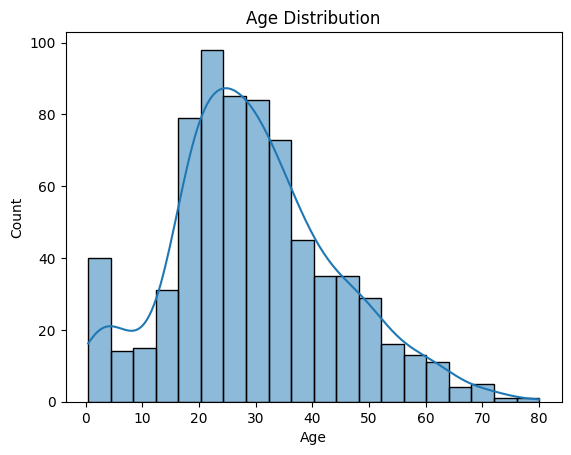

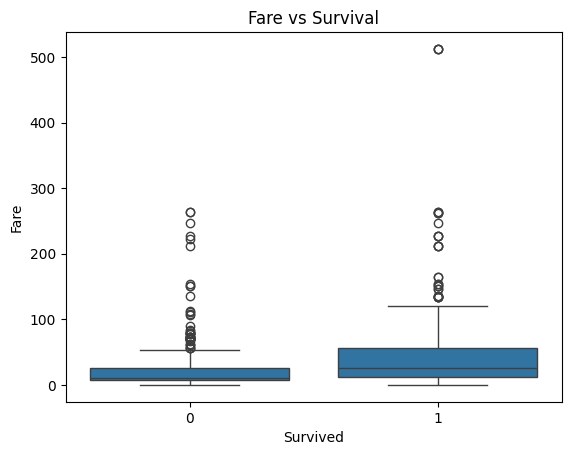

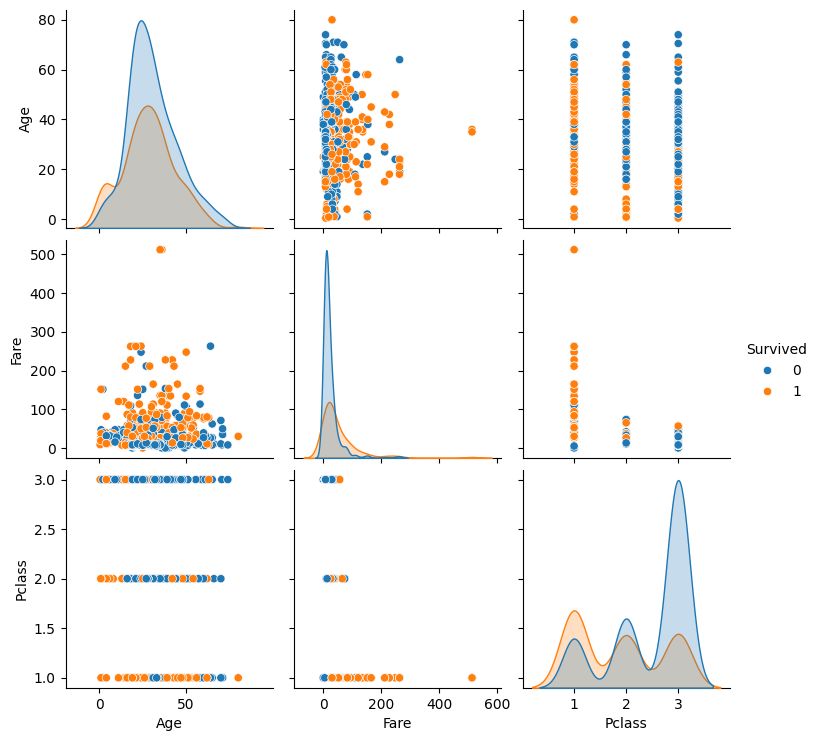

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for Age
sns.histplot(data=train_df, x='Age', kde=True)
plt.title("Age Distribution")
plt.show()

# Box plot for Fare by Survived
sns.boxplot(data=train_df, x='Survived', y='Fare')
plt.title("Fare vs Survival")
plt.show()

# Pairplot with selected features
sns.pairplot(train_df[['Survived', 'Age', 'Fare', 'Pclass']].dropna(), hue='Survived')
plt.show()


In [4]:
# Fill Age with median and Embarked with mode
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)


In [5]:
# Drop irrelevant features
drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']
train_df = train_df.drop(columns=drop_cols)
test_df = test_df.drop(columns=drop_cols)

# Convert categorical variables
train_df = pd.get_dummies(train_df, drop_first=True)
test_df = pd.get_dummies(test_df, drop_first=True)

# Ensure both train and test have the same columns
missing_cols = set(train_df.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0
test_df = test_df[train_df.drop(columns=['Survived']).columns]


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
ROC AUC: 0.8824967824967825


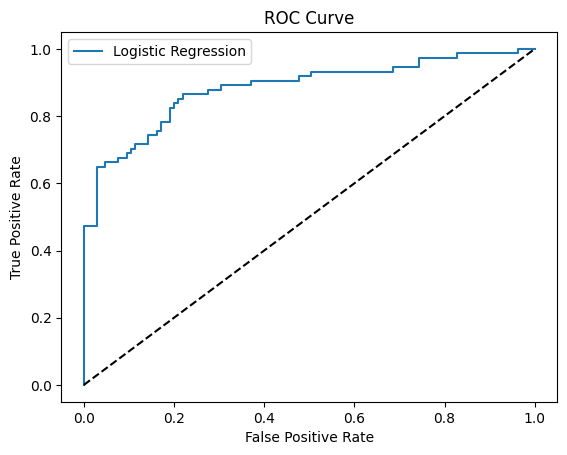

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:, 1]

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("ROC AUC:", roc_auc_score(y_val, y_prob))

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_val, y_prob)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [8]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)


      Feature  Coefficient
4        Fare     0.002581
1         Age    -0.030570
3       Parch    -0.108423
6  Embarked_Q    -0.111847
2       SibSp    -0.295026
7  Embarked_S    -0.399744
0      Pclass    -0.937596
5    Sex_male    -2.592013


In [10]:
import pickle
pickle.dump(model, open('logistic_model.pkl', 'wb'))


In [11]:
import streamlit as st
import pandas as pd
import pickle

model = pickle.load(open('logistic_model.pkl', 'rb'))

st.title("Titanic Survival Predictor")

Pclass = st.selectbox("Passenger Class", [1, 2, 3])
Sex_male = st.selectbox("Gender", ["Male", "Female"]) == "Male"
Age = st.slider("Age", 0, 80, 30)
SibSp = st.number_input("Siblings/Spouse Aboard", 0, 10)
Parch = st.number_input("Parents/Children Aboard", 0, 10)
Fare = st.slider("Fare", 0.0, 500.0, 32.0)
Embarked_Q = st.selectbox("Embarked Q?", [0, 1])
Embarked_S = st.selectbox("Embarked S?", [0, 1])

input_data = pd.DataFrame([{
    'Pclass': Pclass,
    'Age': Age,
    'SibSp': SibSp,
    'Parch': Parch,
    'Fare': Fare,
    'Sex_male': int(Sex_male),
    'Embarked_Q': Embarked_Q,
    'Embarked_S': Embarked_S
}])

if st.button("Predict"):
    prediction = model.predict(input_data)
    st.write("Survived" if prediction[0] == 1 else "Not Survived")


2025-07-14 19:58:46.438 
  command:

    streamlit run C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
